In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [2]:
%matplotlib inline

# 1d case

In [3]:
fs_IS = []
fs_ISCE = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6):
    fs_IS.append(h5py.File(f'IS/PureShear/Shear/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/PureShear/Shear/data_serial_TIx_{n}.hdf5', 'r'))

In [4]:
fs_IS, fs_ISCE

([<HDF5 file "data_serial_TIx_0.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_1.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_2.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_3.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_4.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_5.hdf5" (mode r)>],
 [<HDF5 file "data_serial_TIx_0.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_1.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_2.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_3.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_4.hdf5" (mode r)>,
  <HDF5 file "data_serial_TIx_5.hdf5" (mode r)>])

In [5]:
fs_IS[0]['Primitive/pi11'].shape, fs_ISCE[0]['Primitive/pi11'].shape

((400,), (400,))

In [6]:
fs_IS[0]['Domain'].attrs.keys()
fs_ISCE[0]['Domain'].attrs.keys()
fs_ISCE[0]['Domain'].attrs['xmin']

array([-1.])

In [7]:
eta = fs_IS[0]['Optional'].attrs['eta'][0]
tau_pi = fs_IS[0]['Optional'].attrs['tau_pi'][0]
print(f"Dissipation strength {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs_IS[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 0.01, relaxation time 0.1, timestep 0.0005


In [8]:
eta = fs_ISCE[0]['Optional'].attrs['eta'][0]
tau_pi = fs_ISCE[0]['Optional'].attrs['tau_pi'][0]
print(f"Dissipation strength {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs_ISCE[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 0.01, relaxation time 0.1, timestep 0.0005


In [9]:
print(fs_IS[-1].attrs['t'])
print(fs_ISCE[-1].attrs['t'])

[6.]
[6.]


In [10]:
#fs_ISCE[-1]['Auxiliary/pi11NS'][:]

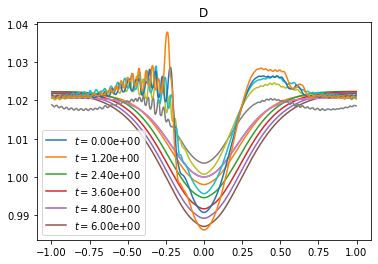

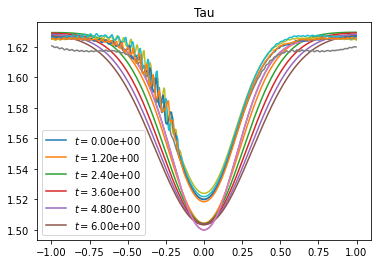

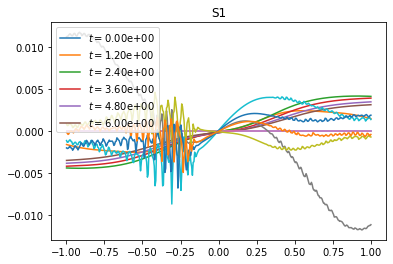

In [11]:
#nslice=fs_IS[0]['Domain'].attrs['ny'][0]//2
for quant in['D','Tau','S1']:
    plt.figure()
    for f in fs_IS:
        #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    for f in fs_ISCE:
        #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Conserved/'+quant][:])#,label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Cons_"+quant+".pdf")
    plt.show()


In [12]:
# for quant in['D','Tau','S1']:
#     plt.figure()
#     for n in range(len(fs_IS)):
#         #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.plot(fs_IS[n]['Domain/x'], (fs_IS[n]['Conserved/'+quant][:] - fs_ISCE[n]['Conserved/'+quant][:])/fs_IS[n]['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.title(quant)
#     plt.legend()
#     plt.savefig("ComparePlots/ConsRelDiff_"+quant+".pdf")
#     plt.show()

INITIAL DATA


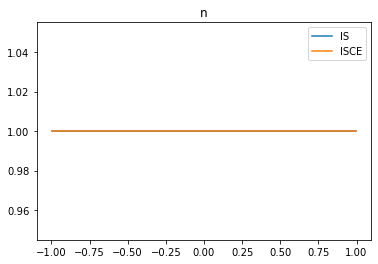

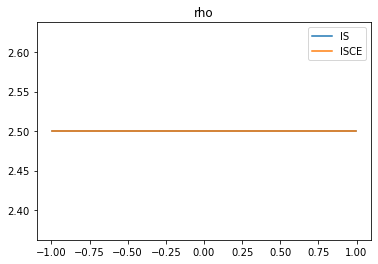

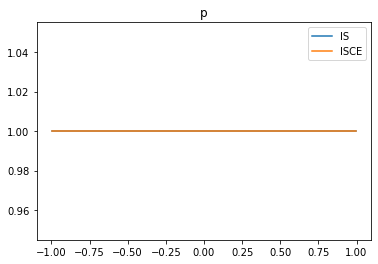

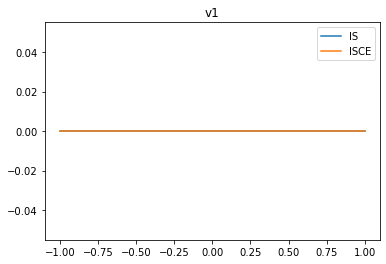

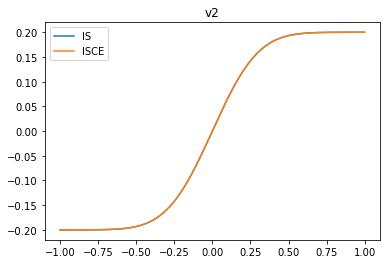

In [13]:
print("INITIAL DATA")
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[0]
#    plt.plot(f['Domain/x'], f['Primitive/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
    fISCE = fs_ISCE[0]
    plt.plot(fIS['Domain/x'], fIS['Primitive/'+quant][:],label='IS')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.plot(fISCE['Domain/x'], fISCE['Primitive/'+quant][:],label='ISCE')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


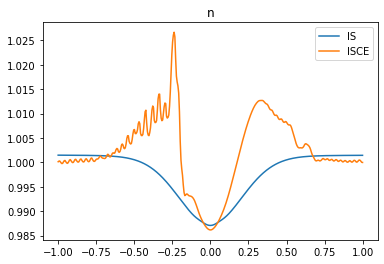

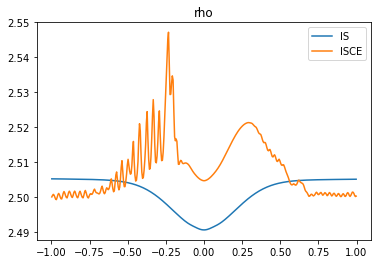

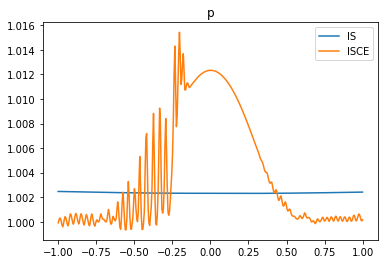

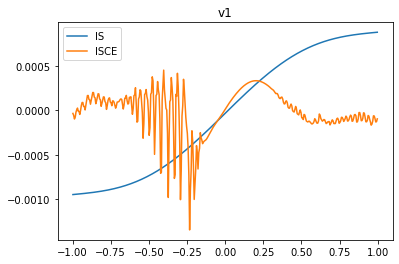

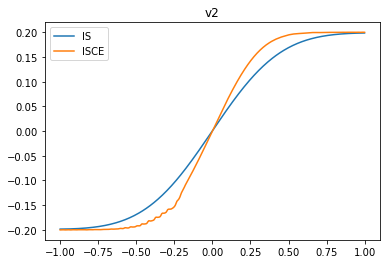

In [14]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
#    plt.plot(f['Domain/x'], f['Primitive/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], fIS['Primitive/'+quant][:],label='IS')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.plot(fISCE['Domain/x'], fISCE['Primitive/'+quant][:],label='ISCE')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


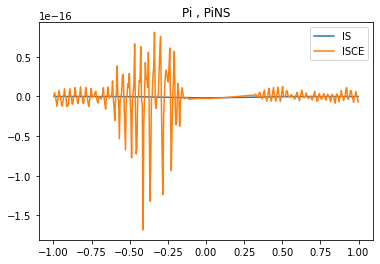

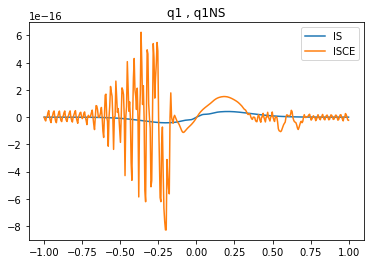

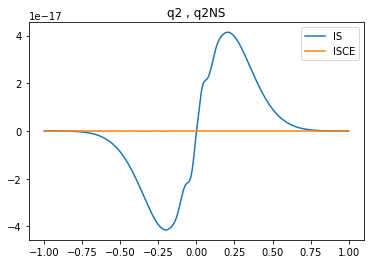

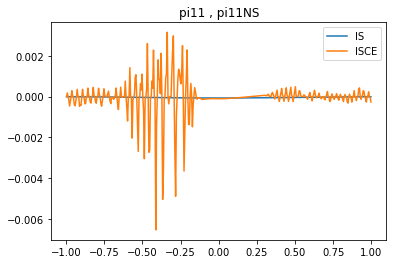

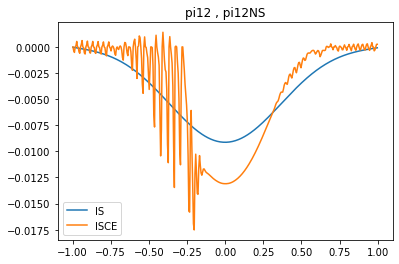

In [15]:
for quant in ['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
#    plt.plot(f['Domain/x'], f['Primitive/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], fIS['Primitive/'+quant][:],label='IS')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.plot(fISCE['Domain/x'], fISCE['Auxiliary/'+quant+'NS'][:],label='ISCE')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' , '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")

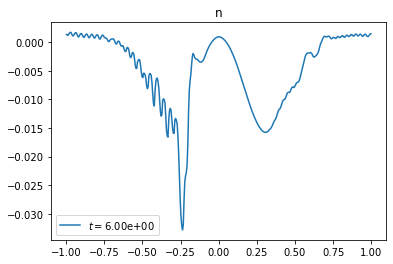

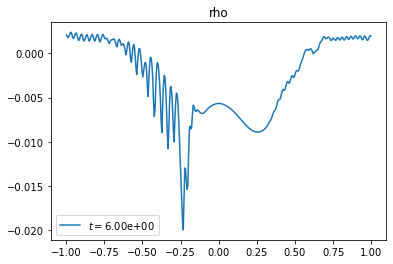

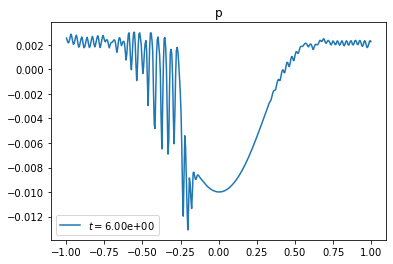

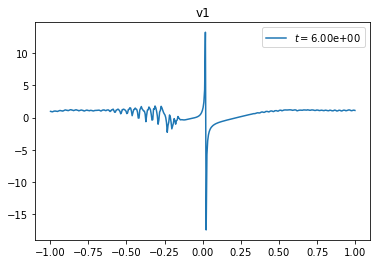

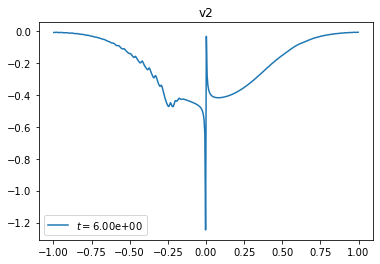

In [16]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Primitive/'+quant][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/PrimsRelDiff_"+quant+".pdf")
    plt.show()
    

In [17]:
# for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
#     plt.figure()
#     #for f in fs:
#     fIS = fs_IS[-1]
#     fISCE = fs_ISCE[-1]
#     plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#     plt.title(quant+' - '+quant+'NS / '+quant)
#     plt.legend()
#     plt.savefig("ComparePlots/PrimsDiff_"+quant+".pdf")
#     plt.show()
    

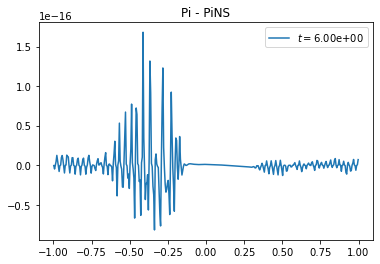

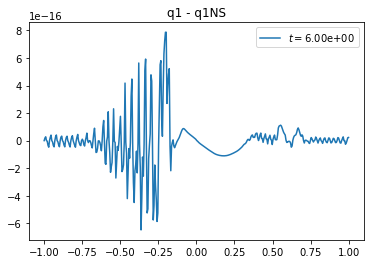

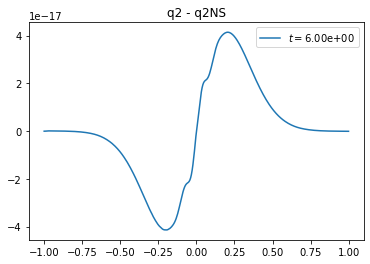

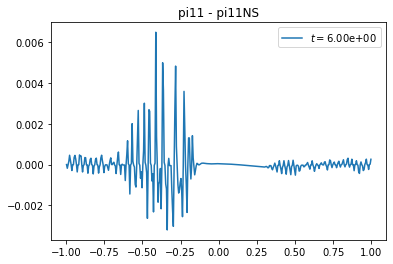

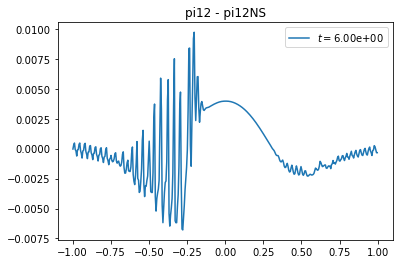

In [18]:
for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:]),label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' - '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/PrimsAbsDiff_"+quant+".pdf")
    plt.show()
    

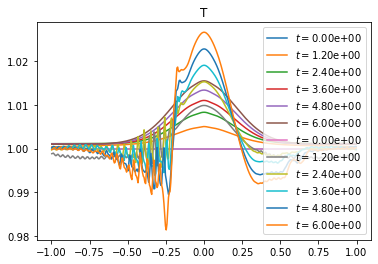

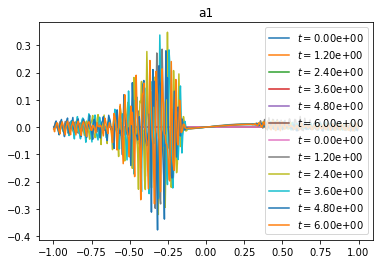

In [19]:
for quant in ['T','a1']:
    plt.figure()
    for f in fs_IS:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    for f in fs_ISCE:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Aux_"+quant+".pdf")
    plt.show()
